In [1]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
SAMPLE_DIR = "../data/sample/sample_5_percent.parquet"

In [3]:
df = pl.read_parquet(SAMPLE_DIR)
print(df.head())

shape: (5, 40)
┌────────────┬────────────┬────────────┬───────────┬───┬──────────┬────────┬───────────┬───────────┐
│ Header_Len ┆ Protocol   ┆ Time_To_Li ┆ Rate      ┆ … ┆ IAT      ┆ Number ┆ Variance  ┆ label     │
│ gth        ┆ Type       ┆ ve         ┆ ---       ┆   ┆ ---      ┆ ---    ┆ ---       ┆ ---       │
│ ---        ┆ ---        ┆ ---        ┆ f32       ┆   ┆ f32      ┆ f32    ┆ f32       ┆ str       │
│ f32        ┆ f32        ┆ f32        ┆           ┆   ┆          ┆        ┆           ┆           │
╞════════════╪════════════╪════════════╪═══════════╪═══╪══════════╪════════╪═══════════╪═══════════╡
│ 20.0       ┆ 6.0        ┆ 66.279999  ┆ 3922.6599 ┆ … ┆ 0.000255 ┆ 100.0  ┆ 138.33647 ┆ DDOS-SYNO │
│            ┆            ┆            ┆ 12        ┆   ┆          ┆        ┆ 2         ┆ NYMOUSIP_ │
│            ┆            ┆            ┆           ┆   ┆          ┆        ┆           ┆ FLOOD     │
│ 0.0        ┆ 1.0        ┆ 64.0       ┆ 46020.453 ┆ … ┆ 0.000022 ┆ 100.0  ┆

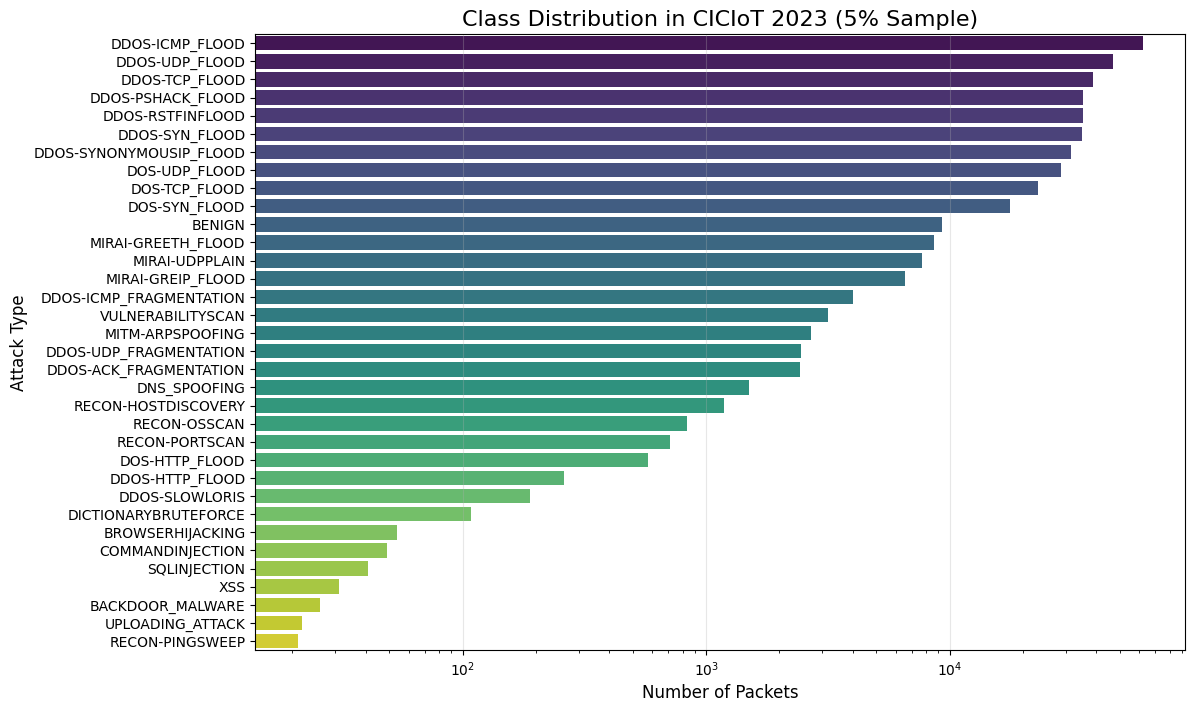

In [5]:
label_counts = df["label"].value_counts(sort=True).to_pandas()
plt.figure(figsize=(12, 8))
sns.barplot(data=label_counts, x="count", y="label", hue="label", palette="viridis", legend=False)

plt.title("Class Distribution in CICIoT 2023 (5% Sample)", fontsize=16)
plt.xlabel("Number of Packets", fontsize=12)
plt.ylabel("Attack Type", fontsize=12)
plt.xscale("log")  
plt.grid(axis="x", alpha=0.3)
plt.show()


In [6]:
df.describe().to_pandas()

,statistic,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,label
0,count,407358.000000,407358.000000,407358.000000,4.073580e+05,407358.000000,407358.000000,407358.000000,407358.00000,407358.000000,...,407358.000000,407358.000000,407358.000000,407358.000000,407358.000000,407358.000000,4.073580e+05,407358.000000,4.073580e+05,407358
1,null_count,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0
2,mean,13.736959,9.091769,66.514626,2.835412e+04,0.087427,0.206997,0.093342,0.09379,0.129233,...,10961.415039,80.008141,223.148621,131.155136,41.010551,131.155136,5.691975e-03,95.575256,3.398241e+04,None
3,std,8.718325,9.103443,14.366564,3.233093e+04,0.280128,0.399833,0.283957,0.27699,0.316034,...,16862.531250,107.575737,581.219421,228.845032,179.723755,228.845032,2.597021e+00,19.420729,4.107243e+05,None
4,min,0.000000,0.000000,0.000000,6.150110e-04,0.000000,0.000000,0.000000,0.00000,0.000000,...,180.000000,42.000000,54.000000,50.400002,0.000000,50.400002,1.362392e-07,2.000000,0.000000e+00,BACKDOOR_MALWARE
5,25%,8.000000,6.000000,64.000000,1.136083e+04,0.000000,0.000000,0.000000,0.00000,0.000000,...,6000.000000,60.000000,60.000000,60.000000,0.000000,60.000000,2.674103e-05,100.000000,0.000000e+00,None
6,50%,20.000000,6.000000,64.000000,2.462458e+04,0.000000,0.000000,0.000000,0.00000,0.000000,...,6000.000000,60.000000,60.000000,60.000000,0.000000,60.000000,4.113913e-05,100.000000,0.000000e+00,None
7,75%,20.000000,17.000000,64.000000,3.787866e+04,0.000000,0.010000,0.000000,0.00000,0.010000,...,6010.000000,60.000000,74.000000,60.250000,0.844232,60.250000,8.906126e-05,100.000000,7.127272e-01,None
8,max,60.000000,47.000000,255.000000,7.340032e+06,1.000000,1.000000,1.000000,1.00000,1.000000,...,244072.000000,2974.000000,29026.000000,5858.000000,9078.022461,5858.000000,1.625987e+03,100.000000,8.241050e+07,XSS


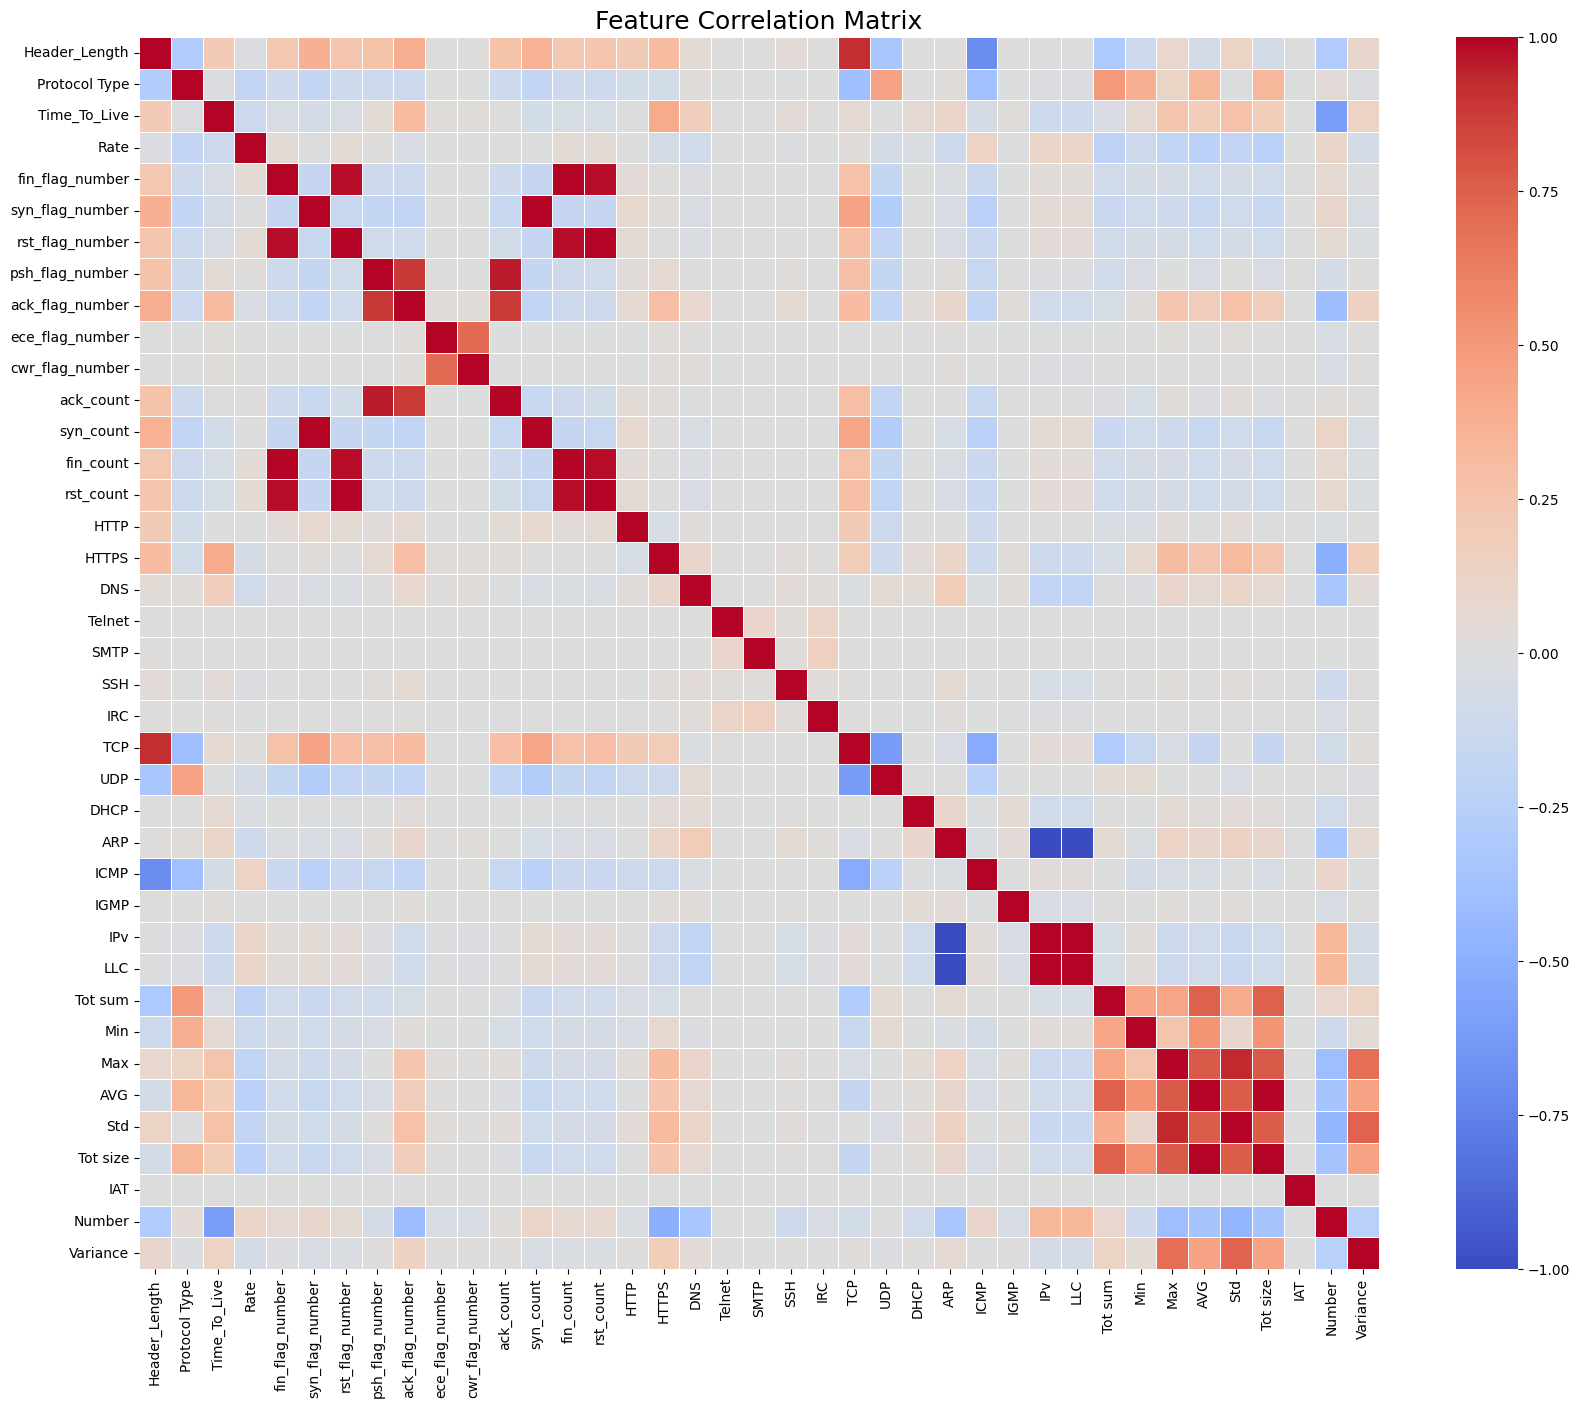

In [8]:
numeric_df = df.select(pl.col(pl.Float32))
corr_matrix = numeric_df.corr().to_pandas()
corr_matrix.index = numeric_df.columns
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix", fontsize=18)
plt.show()

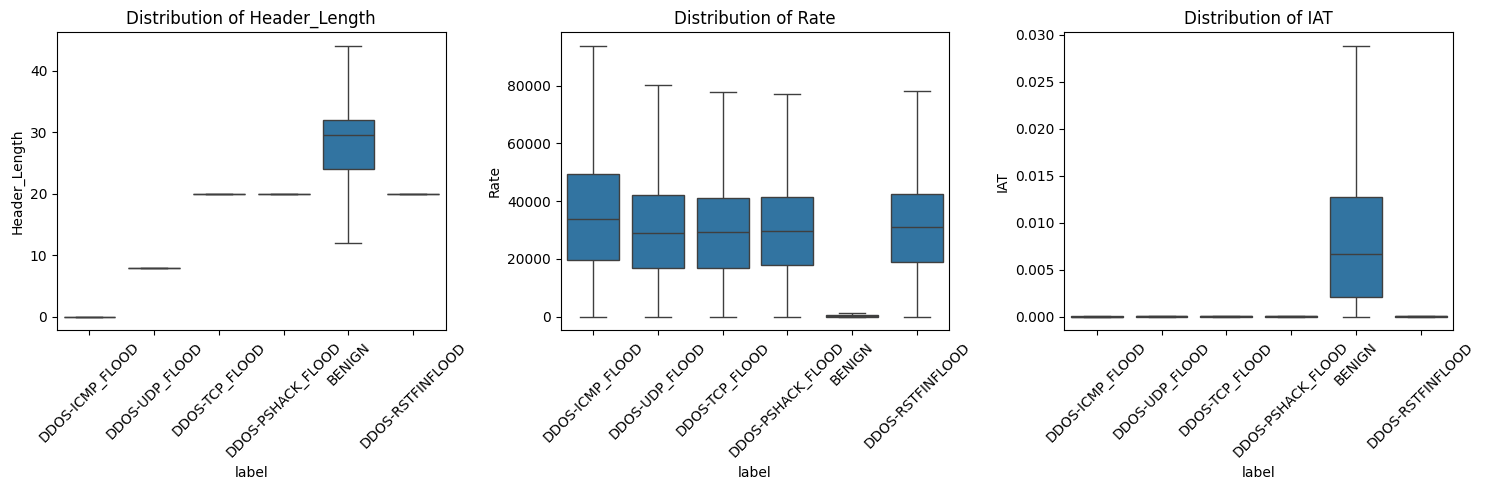

In [10]:

features_to_check = ["Header_Length", "Rate", "IAT"] 

top_labels = df["label"].value_counts(sort=True).head(5)["label"].to_list()
top_labels.append("BENIGN")
filtered_df = df.filter(pl.col("label").is_in(top_labels)).to_pandas()

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_to_check):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=filtered_df, x="label", y=feature, showfliers=False) 
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()